# (2주차) 9월13일 
> 이미지 자료에 대한 이해, 산점도, 상관계수 

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-y77GdPSUNw79-7NUdYpjqy

`-` (1/3) 이미지 자료에 대한 이해

`-` (2/3) 산점도와 상관계수 1 

`-` (3/3) 산점도와 상관계수 2

### (지난강의노트 보충) 이미지 자료에 대한 이해 

`-` 흑백이미지
- 차원: 세로픽셀수 $\times$ 가로픽셀수
- 값: 0~255 (값이 클수록 흰색) 

`-` 칼라이미지 
- 차원: 세로픽셀수 $\times$ 가로픽셀수 $\times$ 3 
- 값: 0~255 (값이 클수록 진한빨강, 진한파랑, 진한녹색) 

In [108]:
import cv2 as cv

In [109]:
hani=cv.imread('2021-08-25-Hani01.jpeg') 

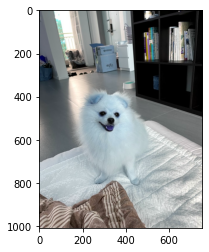

In [110]:
import matplotlib.pyplot as plt 
plt.imshow(hani)

In [111]:
hani.shape

(1009, 757, 3)

In [112]:
import numpy as np
hani_red=np.zeros_like(hani)
hani_green=np.zeros_like(hani)
hani_blue=np.zeros_like(hani)
hani_red[:,:,0]=hani[:,:,0]
hani_green[:,:,1]=hani[:,:,1]
hani_blue[:,:,2]=hani[:,:,2]

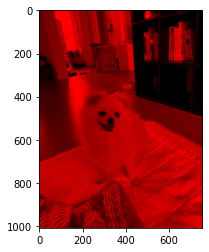

In [113]:
plt.imshow(hani_red)

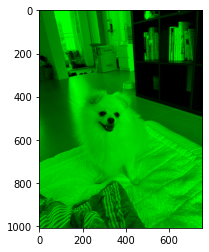

In [114]:
plt.imshow(hani_green)

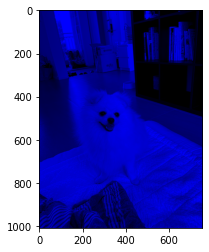

In [115]:
plt.imshow(hani_blue)

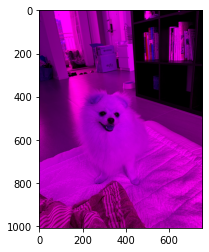

In [116]:
plt.imshow(hani_blue+hani_red)

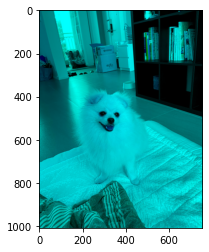

In [117]:
plt.imshow(hani_blue+hani_green)

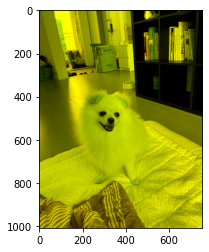

In [118]:
plt.imshow(hani_red+hani_green)

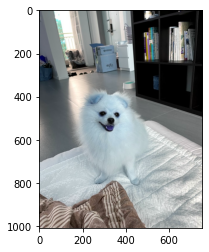

In [119]:
plt.imshow(hani_red+hani_green+hani_blue)

### 산점도 (scatter plot)

In [120]:
import matplotlib.pyplot as plt 

`-` 산점도: 직교 좌표계(도표)를 이용해 좌표상의 점들을 표시함으로써 두 개 변수 간의 관계를 나타내는 그래프 방법이다. 
- ref: https://ko.wikipedia.org/wiki/%EC%82%B0%EC%A0%90%EB%8F%84

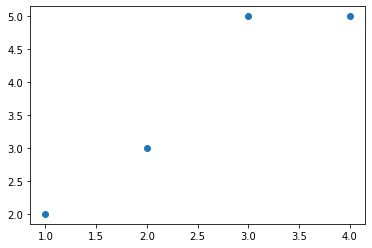

In [121]:
x=[1,2,3,4]
y=[2,3,5,5] 
plt.plot(x,y,'o')

`-` 산점도는 보통 $X$와 $Y$의 관계를 알고 싶을 경우 그린다.  
- 박스플랏, 히스토그램은 그림을 그리기 위해서 하나의 변수만 필요함; 산점도를 위해서는 두개의 변수가 필요함. 
- 두변수 $\to$ 두변수의 관계

#### 몸무게와 키 

`-` 아래와 같은 자료를 수집하였다고 하자. 
- 몸무게 = [44,48,49,58,62,68,69,70,76,79] 
- 키 = [159,160,162,165,167,162,165,175,165,172]

In [122]:
x=[44,48,49,58,62,68,69,70,76,79]
y=[159,160,162,165,167,162,165,175,165,172]

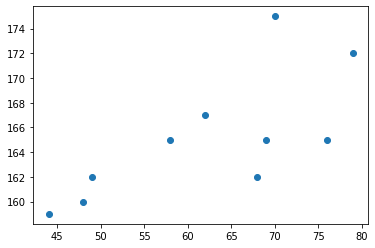

In [123]:
plt.plot(x,y,'o')

- 키가 큰 사람일수록 몸무게도 많이 나간다. (반대도 성립) 
- 키와 몸무게는 관계가 있어보인다. (정비례) 

`-` 얼만큼 정비례인지? 
- 이 질문에 대답하기 위해서는 상관계수의 개념을 알아야 한다. 
- 상관계수에 대한 개념은 산점도를 이해함에 있어서 핵심개념이다. 

#### 상관계수 (몸무게-키 예제를 더 깊게 이해하기 위해 필요한 개념) 

`-` (표본)상관계수 

$$r=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2\sum_{i=1}^{n}(y_i-\bar{y})^2 }} $$


- 복잡해 보이지만 아무튼 (1) 분자를 계산하고 (2) 분모를 계산하고 분자를 분모로 나누면 되는 것. 
- 분모를 계산했다고 치자. 계산한 값을 어떤 상수 $c$라고 생각하자. 이 값을 분자안에 넣을수도 있다. 


$$r=\sum_{i=1}^{n}\frac{1}{c}(x_i-\bar{x})(y_i-\bar{y}) $$

- 위의 식은 아래와 같이 다시 쓸 수 있다. 

$$r=\sum_{i=1}^{n}\left( \frac{(x_i-\bar{x})}{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}}\frac{(y_i-\bar{y})}{\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}} \right)$$

- 편의상 아래와 같이 정의하자. $\tilde{x}_i=\frac{(x_i-\bar{x})}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}}$, $\tilde{y}_i=\frac{(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}$

- 결국 $r$은 아래와 같은 모양이다. 

$$r=\sum_{i=1}^{n}\tilde{x}_i \tilde{y}_i $$

`-` 의미? 

In [124]:
import numpy as np
x=np.array(x)
y=np.array(y)

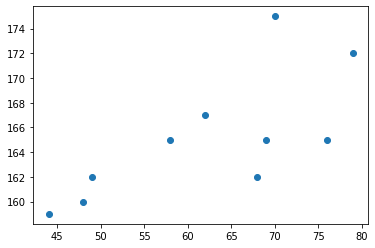

In [125]:
plt.plot(x,y,'o')

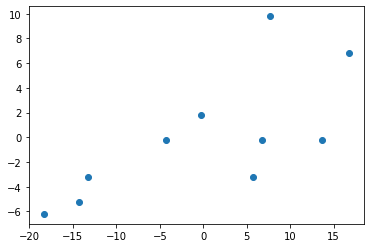

In [126]:
plt.plot(x-np.mean(x), y-np.mean(y),'o')

`-` $a=\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}, b=\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}$

In [127]:
a=np.sqrt(np.sum((x-np.mean(x))**2))
b=np.sqrt(np.sum((y-np.mean(y))**2))
a,b

(36.58004920718396, 15.218409903797438)

- $a>b$ 이므로 $\{x_i\}$들이 $\{y_i\}$들 보다 좀 더 퍼져있다. (=평균근처에 몰려있지 않다) 

`-` 사실 $a,b$는 아래와 같이 계산할 수 있다.

$a=\sqrt{n}\times{\tt np.std(x)}$ 

$b=\sqrt{n}\times{\tt np.std(y)}$ 

In [128]:
n=len(x)
np.sqrt(n)*np.std(x), np.sqrt(n)*np.std(y)

(36.58004920718397, 15.21840990379744)

- ${\tt np.std(x)}=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2}$
- ${\tt np.std(y)}=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\bar{y})^2}$

> note: ${\tt np.std(x,ddof=1)}=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2}$

`-` 이제 $(\tilde{x}_i,\tilde{y}_i)$를 그려보자. 

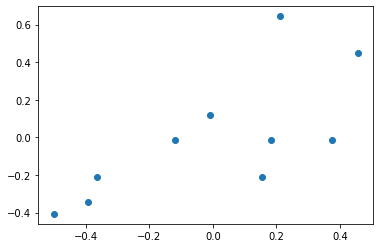

In [129]:
xx= (x-np.mean(x))/a
yy= (y-np.mean(y))/b
plt.plot(xx,yy,'o')

- 평균도 비슷하고 퍼진정도도 비슷하다. 

`-` 질문1: $r$의 값이 양수인가? 음수인가? 

plotly 사용하여 그려보자. 

In [130]:
import plotly.express as px 
from IPython.display import HTML 
fig=px.scatter(x=xx, y=yy)
HTML(fig.to_html(include_plotlyjs='cdn',include_mathjax=False))

- $\tilde{x}_i$, $\tilde{y}_i$ 를 곱한값이 양수인것과 음수인것을 체크해보자. 
- 양수인쪽이 많은지 음수인쪽이 많은지 생각해보자. 
- $r=\sum_{i=1}^{n}\tilde{x}_i \tilde{y}_i$ 의 부호는? 

`-` 질문2: 아래와 같은 두개의 데이터set이 있다고 하자. 

In [131]:
x1=np.arange(0,10,0.1)
y1=x1+np.random.normal(loc=0,scale=1.0,size=len(x1))

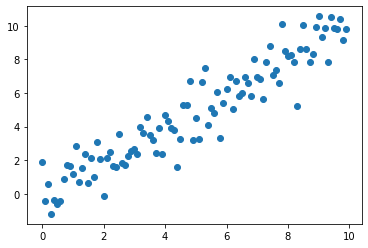

In [132]:
plt.plot(x1,y1,'o')

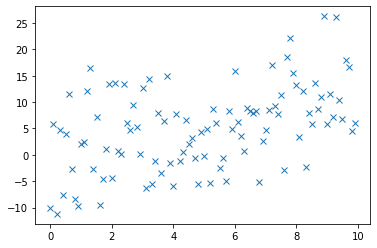

In [133]:
x2=np.arange(0,10,0.1)
y2=x2+np.random.normal(loc=0,scale=7.0,size=len(x2))
plt.plot(x2,y2,'x')

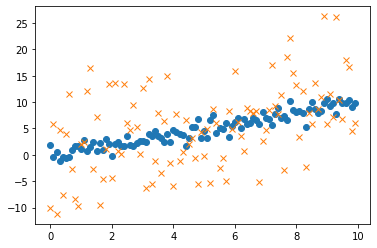

In [134]:
plt.plot(x1,y1,'o')
plt.plot(x2,y2,'x')

각 데이터셋의 표준상관계수를 각각 $r_1$(파란색), $r_2$(주황색)라고 하자. 

(1) $r_1$, $r_2$의 부호는 양수인가? 음수인가? 

(2) $r_1,r_2$의 값중 어떠한 값이 더 절대값이 큰가? 

In [135]:
n=len(x1)
xx1= (x1-np.mean(x1)) / (np.std(x1) * np.sqrt(n))
yy1= (y1-np.mean(y1)) / (np.std(y1) * np.sqrt(n))
xx2= (x2-np.mean(x2)) / (np.std(x2) * np.sqrt(n))
yy2= (y2-np.mean(y2)) / (np.std(y2) * np.sqrt(n))

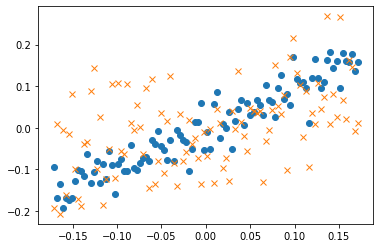

In [136]:
plt.plot(xx1,yy1,'o') ## 파란색
plt.plot(xx2,yy2,'x') ## 주황색

In [137]:
sum(xx1*yy1), sum(xx2*yy2)

(0.9422426257344966, 0.4539974817112052)

### [숙제](https://ieilms.jbnu.ac.kr/)

`-` 임의의 이미지를 cv.imread() 로 불러온뒤에 아래와 같이 blue+green의 조합으로 이미지를 변경해볼것 

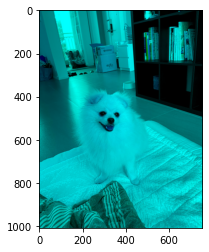

In [138]:
plt.imshow(hani_blue+hani_green)